# Training a  multilayer neural network #
The code below enables you to build and train a multilayer neural network. It follows the structure developed in the "Multilayer Neural Networks" session of the notes. It uses the neural network python library Keras.

### Imports ###

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers 
from keras.datasets import mnist, reuters
from keras.utils import to_categorical

## Linearly inseparable "moon shaped" clusters

### Obtain and visualise data

In [27]:
X_train,y_train = make_moons(n_samples=200,noise = 0.1, random_state=3)
#X_val, y_val = make_moons(n_samples=50,noise = 0.1, random_state=4)
X_test, y_test = make_moons(n_samples=50,noise = 0.1, random_state=5)

In [28]:
X_train.shape

(200, 2)

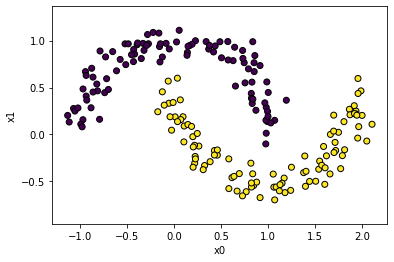

In [29]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, edgecolor='k')
plt.xlabel('x0')
plt.ylabel('x1')
#plt.title('Not Linearly Separable Clusters')
plt.axis('equal');

### Build a neural network

In [30]:
## 1 ## Architecture
network = models.Sequential()
network.add(layers.Dense(20, activation='relu', input_dim=2))
network.add(layers.Dense(5, activation='relu'))
network.add(layers.Dense(5, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

## 2 ## Optimizer and Error function
network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 3 ## Train
network.fit(X_train,y_train, epochs=300)

Epoch 1/300
7/7 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.5041
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.4965
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5409
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6151
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7006
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7376
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6981
Epoch 8/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7255
Epoch 9/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.7531
Epoch 10/300
7/7 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7921
Epoch 11/300
7/7 [===========

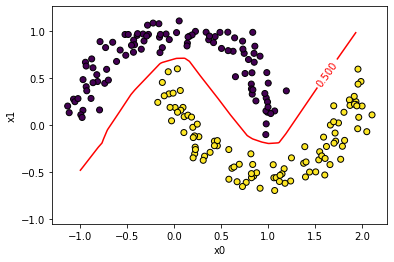

In [21]:
x0 = np.arange(-1.0,2.0,0.01)
x1 = np.arange(-1.0, 1.0, 0.01)
X0, X1 = np.meshgrid(x0,x1)
plotpoints = np.vstack((X0.flatten(), X1.flatten())).transpose() # convert X0, X1 to two column matrix
nn_output = network.predict(plotpoints).reshape(X0.shape) 
contours = plt.contour(X0,X1,nn_output,1,cmap='brg')
plt.clabel(contours)

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, edgecolor='k')
plt.xlabel('x0')
plt.ylabel('x1')
plt.axis('equal');
plt.savefig('NNsuccess.png')

The following example are adapted from François Chollet's book *Deep Learning with Python*.

## Digit Recognition ##
The MNIST database of handwritten digits is one of the standard "benchmark" datasets available for learning about machine learning. It consists of 60,000 examples for training, and 10,000 examples for testing.

In [22]:
(raw_train_images, raw_train_labels), (raw_test_images, raw_test_labels) = mnist.load_data()

This command loads the data into Numpy arrays. We can inspect the dimensions to see that we do in fact have 60,000 training examples, and each example is a 28 by 28 array of pixel gray scale values. We then can then visualize the first 10 digits in the training set:

In [23]:
def show_image(image, label):
    """Displays a MNIST digit and its label"""
    plt.title('Item {count} is a {lbl}'.format(count=i, lbl=label))
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.show()

The dimensions of the training data are (60000, 28, 28) 

The first 28 by 28 array is
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  3

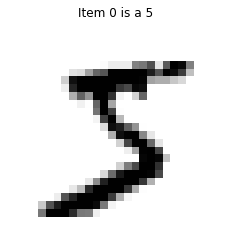

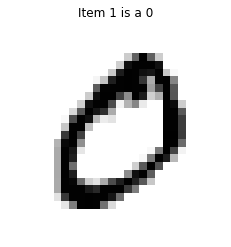

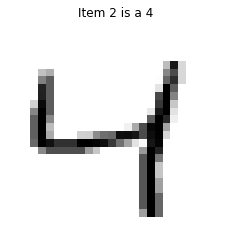

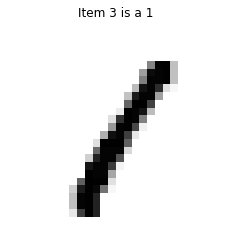

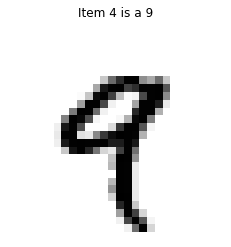

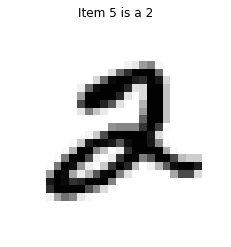

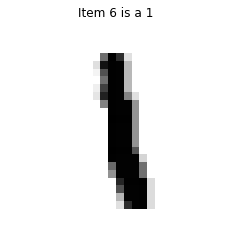

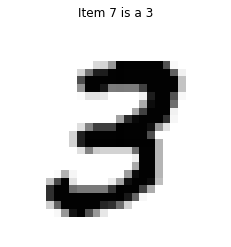

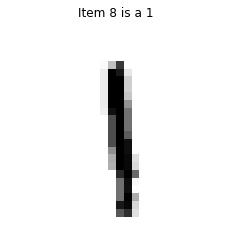

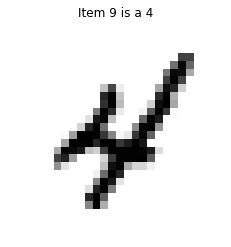

In [24]:
print('The dimensions of the training data are', raw_train_images.shape, '\n')
print('The first 28 by 28 array is\n', raw_train_images[0])
print('Examples of the images in the training data set are:')
for i in range(10):
    show_image(image=raw_train_images[i],label = raw_train_labels[i])


We can now build our neural network. We first need to reshape the input data from a 28 by 28 array into a 784 by 1 array to feed into our network (which will have 784 input neurons). We also "normalize" the data to be a floating point number between 0 and 1. See the notes in session 4 about normalization.

In [ ]:
train_images = raw_train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = raw_test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We need to change the target variable to "one hot" encoding. See the notes in session 4 about this.

In [ ]:
train_labels = to_categorical(raw_train_labels)
test_labels  = to_categorical(raw_test_labels)
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Now we go through our 3 step neural network procedure:

In [25]:
## 1 ## Architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

## 2 ## Optimizer and Error
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## 3 ## Train
network.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3285 - accuracy: 0.9028
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0921 - accuracy: 0.9725
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0666 - accuracy: 0.9801
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0487 - accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0368 - accuracy: 0.9897


So on the training set our network achieves close to 99% accuracy. How does it do on the test set?

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Accuracy on test set =", test_acc)

10000/10000 [==============================] - 1s 51us/step
Accuracy on test set = 0.9796000123023987


Let's also take a look at some of the images the network got wrong, to see if we can spot anything interesting:

Item 217 was classified as a 5


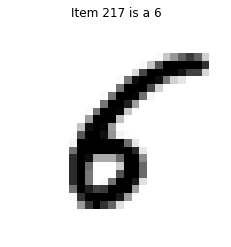

Item 221 was classified as a 7


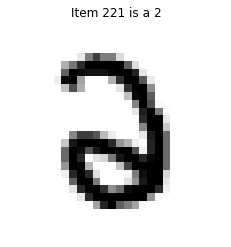

Item 247 was classified as a 2


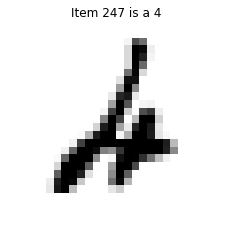

Item 259 was classified as a 0


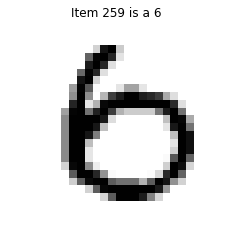

Item 320 was classified as a 8


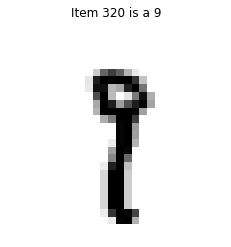

Item 321 was classified as a 7


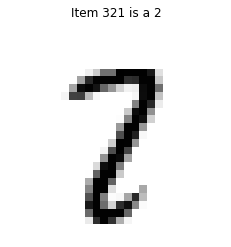

Item 340 was classified as a 3


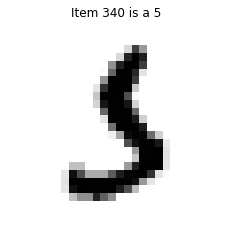

Item 359 was classified as a 8


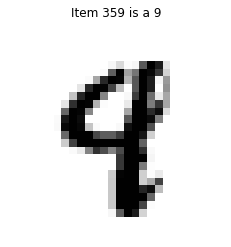

Item 381 was classified as a 7


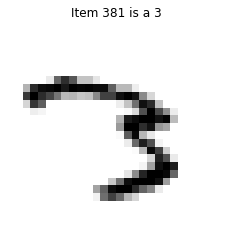

Item 445 was classified as a 0


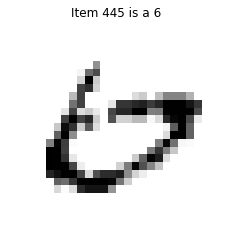

In [ ]:
output = network.predict(test_images)
prediction = np.argmax(output,axis=1) # make predicted digit the one with largest output
is_incorrect = (prediction != raw_test_labels) # Boolean array with True if prediction and label differ
incorrect_idx = np.nonzero(is_incorrect)[0] # indices of all the incorrectly classified images
for i in incorrect_idx[:10]:
    print('Item',i,'was classified as a',prediction[i])
    show_image(image=raw_test_images[i],label = raw_test_labels[i])